## Ejercicio exploración avistamientos de OVNIs

Vamos a explorar un conjunto de datos sobre avistamientos de OVNIs, disponible en este repositorio en `dat/ufos.csv`. 

Lee los datos y límpialos. Luego, haz un análisis gráfico de los datos contestando a las siguientes preguntas:

* ¿Cuáles son las formas de OVNI avistadas más frecuentes (y cuál es esa frecuencia)? Con forma me refiero a: luz, óvalo, triángulo, ...
* ¿Hay meses del año en los que es más probable que se produzca un avistamiento? ¿Hay alguna forma que se vea claramente más frecuentemente en algún momento del año?
* ¿Qué países aparecen en el dataset? ¿Cuál tiene mayor número de avistamientos?
* ¿Cómo se distribuye la duración de los avistamientos?
* Piensa otras preguntas, intenta ver posibles interacciones entre variables, y pinta los gráficos correspondientes

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 40, 40
sns.set_style('darkgrid')

In [5]:
data= pd.read_csv('ufos.csv')

C:\Users\saesc\AppData\Local\Temp\ipykernel_50608\2082758681.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('ufos.csv')


In [7]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


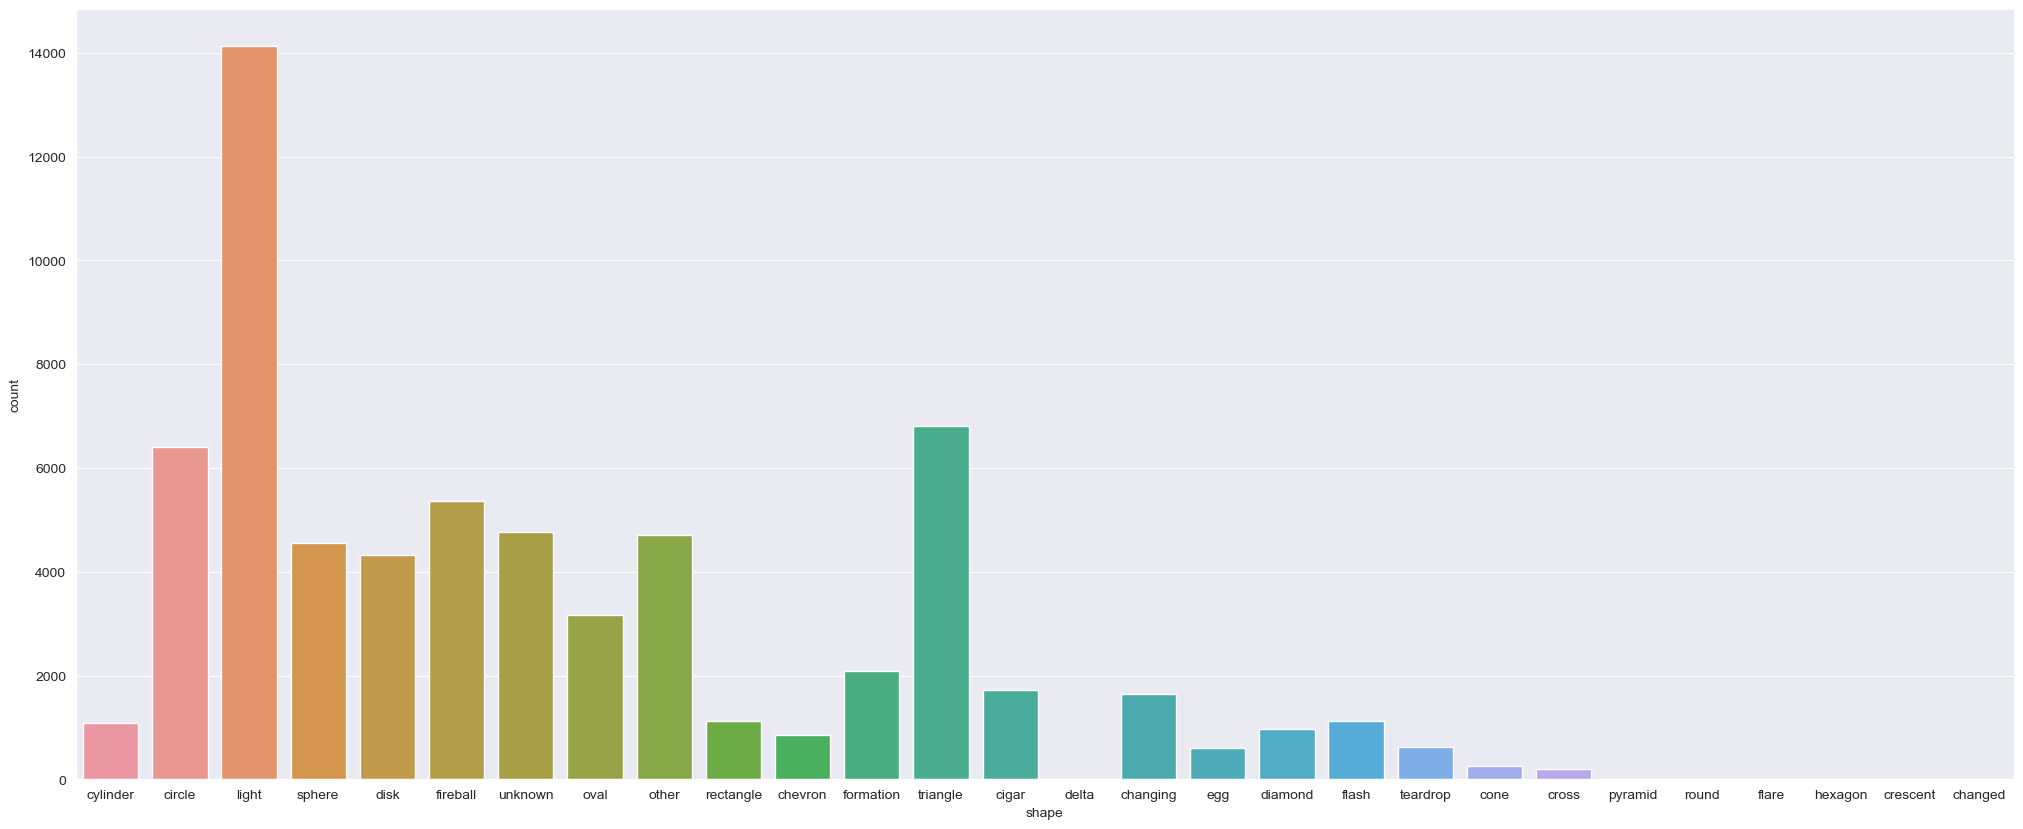

In [114]:

out=sns.countplot(x='shape', data=data)

* ¿Hay meses del año en los que es más probable que se produzca un avistamiento? ¿Hay alguna forma que se vea claramente más frecuentemente en algún momento del año?

In [24]:
Fecha=data['datetime']

In [27]:
Fecha= Fecha.astype(str)

In [47]:
Fecha

0        10/10/1949 20:30
1        10/10/1949 21:00
2        10/10/1955 17:00
3        10/10/1956 21:00
4        10/10/1960 20:00
               ...       
80327      9/9/2013 21:15
80328      9/9/2013 22:00
80329      9/9/2013 22:00
80330      9/9/2013 22:20
80331      9/9/2013 23:00
Name: datetime, Length: 80332, dtype: object

In [49]:
Fecha1= Fecha.str[0:2]

In [73]:
Fecha2= Fecha1.str.rstrip('/')

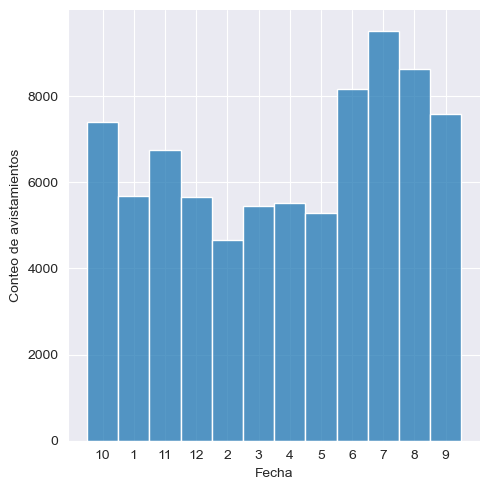

In [115]:
Out= sns.displot(Fecha2)
Out.set_xlabels('Fecha')
Out.set_ylabels('Conteo de avistamientos')

In [78]:
data['Month']= Fecha2

In [79]:
data.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,10
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,10
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10


* ¿Qué países aparecen en el dataset? ¿Cuál tiene mayor número de avistamientos?

In [83]:
data=data.dropna(subset=['country'])
data.info

<bound method DataFrame.info of                datetime                  city state country     shape  \
0      10/10/1949 20:30            san marcos    tx      us  cylinder   
2      10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3      10/10/1956 21:00                  edna    tx      us    circle   
4      10/10/1960 20:00               kaneohe    hi      us     light   
5      10/10/1961 19:00               bristol    tn      us    sphere   
...                 ...                   ...   ...     ...       ...   
80327    9/9/2013 21:15             nashville    tn      us     light   
80328    9/9/2013 22:00                 boise    id      us    circle   
80329    9/9/2013 22:00                  napa    ca      us     other   
80330    9/9/2013 22:20                vienna    va      us    circle   
80331    9/9/2013 23:00                edmond    ok      us     cigar   

      duration (seconds) duration (hours/min)  \
0                   2700           45 minu

In [109]:
conteo_nan = data.isna().sum()
data= data.dropna()

In [91]:
Country= data['country']

In [107]:
Country1 =Country.apply(funcion_lambda)

In [106]:
funcion_lambda = lambda x: 'united states' if x == 'us' else 'great britain' if x == 'gb' else 'australia' if x == 'au' else 'Canada'


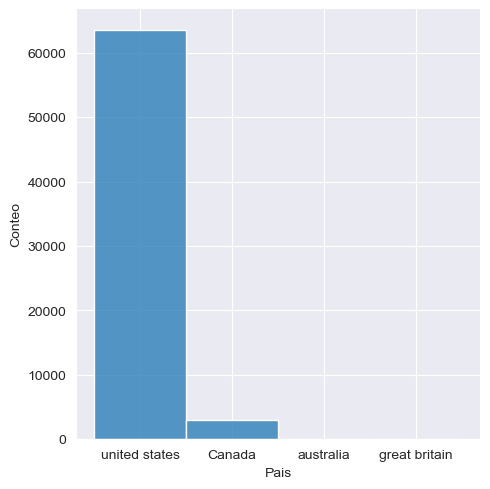

In [117]:
Out=sns.displot(Country1)
Out.set_xlabels('Pais')
Out.set_ylabels('Conteo')


* ¿Cómo se distribuye la duración de los avistamientos?

In [129]:
data = data.rename(columns={'duration(seconds)': 'duration'})

In [201]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Duracion
0,10/10/1949 20:30,san marcos,tx,united states,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,corto
3,10/10/1956 21:00,edna,tx,united states,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,Abduccion
4,10/10/1960 20:00,kaneohe,hi,united states,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,corto
5,10/10/1961 19:00,bristol,tn,united states,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,10,corto
7,10/10/1965 23:45,norwalk,ct,united states,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,10,corto


In [145]:
Duracion=data['duration (seconds)']

In [150]:
data['country']=Country1

In [156]:
Duracion1=Duracion.astype(str)

In [161]:
Duracion1=Duracion1.str.replace('.', ' ')

C:\Users\saesc\AppData\Local\Temp\ipykernel_50608\2054716977.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Duracion1=Duracion1.str.replace('.', ' ')


In [164]:
Duracion1.str.strip

<bound method StringMethods.strip of <pandas.core.strings.accessor.StringMethods object at 0x0000027162C79990>>

In [174]:
Duracion3= Duracion1.str.replace(' ','')

In [188]:
Duracion4=Duracion3.astype(int)

In [194]:
def Tiempo_Duracion(x):
    
    if x>60:
        return 'corto'
    elif 61<x<250:
        return 'corto-mediano'
    elif 251<x<400:
        return 'medio'
    elif 401<x<900:
        return 'Largo'
    else:
        return 'Abduccion'
        
    

In [189]:
Duracion4

0         2700
3           20
4          900
5          300
7         1200
         ...  
80327     6000
80328    12000
80329    12000
80330       50
80331    10200
Name: duration (seconds), Length: 66516, dtype: int32

In [196]:
Duracion5= Duracion4.apply(Tiempo_Duracion)

In [200]:
data['Duracion']=Duracion5

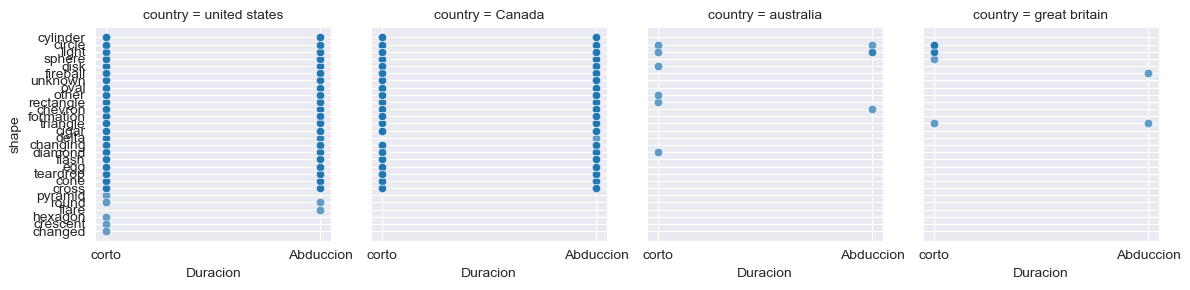

In [208]:
g= sns.FacetGrid(data, col='country')
g.map(sns.scatterplot, 'Duracion', 'shape', alpha=.7)
